In [1]:
# Enable importing of utilities.
import sys
import os
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

# ARDC Training: Python Notebooks
Task-E: This notebook will demonstrate 2D transect analyses and 3D Hovmoller plots. We will run these for NDVI (land) and TSM (water quality) to show the spatial and temporal variation of data along a line (transect) for a given time slice and for the entire time series. 

> ### Import the Datacube Configuration

In [2]:
import datacube
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()
dc = api.dc

>### Browse the available Data Cubes   

In [3]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,time,lon,format,platform,lat,instrument,label,product_type,creation_time,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
13,ls7_ledaps_ghana,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
17,ls7_ledaps_kenya,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000269493, 0.000269493)","(0.99981903, 0.99981903)","(latitude, longitude)"
18,ls7_ledaps_senegal,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"
16,ls7_ledaps_sierra_leone,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
19,ls7_ledaps_tanzania,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000271277688070265, 0.000271139577954979)","(0.999929558226998, 0.999962763497961)","(latitude, longitude)"
31,ls7_ledaps_vietnam,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_7,None,ETM,None,LEDAPS,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
9,ls8_lasrc_ghana,Landsat 8 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_8,None,OLI_TIRS,None,LaSRC,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
10,ls8_lasrc_kenya,Landsat 8 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_8,None,OLI_TIRS,None,LaSRC,None,EPSG:4326,"(-0.000271309115317046, 0.00026957992707863)","(0.999502780827996, 0.999602369607559)","(latitude, longitude)"
11,ls8_lasrc_senegal,Landsat 8 USGS Collection 1 Higher Level SR sc...,None,None,NetCDF,LANDSAT_8,None,OLI_TIRS,None,LaSRC,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"


>### Pick a product  
>Use the platform and product names from the previous block to select a Data Cube.  

In [4]:
# Change the data platform and data cube here

platform = "LANDSAT_7"
# platform = "LANDSAT_8"

# product = "ls7_ledaps_ghana"
# product = "ls7_ledaps_kenya"
# product = "ls7_ledaps_senegal"
# product = "ls7_ledaps_sierra_leone"
# product = "ls7_ledaps_tanzania"
product = "ls7_ledaps_vietnam"

> #### Display Latitude-Longitude and Time Bounds of the Data Cube

In [5]:
from utils.data_cube_utilities.dc_time import _n64_to_datetime, dt_to_str

extents = api.get_full_dataset_extent(platform = platform, product = product, measurements=[])

latitude_extents = (min(extents['latitude'].values),max(extents['latitude'].values))
longitude_extents = (min(extents['longitude'].values),max(extents['longitude'].values))
time_extents = (min(extents['time'].values),max(extents['time'].values))

print("Latitude Extents:", latitude_extents)
print("Longitude Extents:", longitude_extents)
print("Time Extents:", list(map(dt_to_str, map(_n64_to_datetime, time_extents))))

Latitude Extents: (9.176425374578418, 13.964805165051667)
Longitude Extents: (102.40430421277932, 108.93092407802477)
Time Extents: ['1999-09-08', '2016-12-29']


# Visualize Data Cube Region

In [6]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Pick a smaller analysis region and display that region
Try to keep your region to less than 0.2-deg x 0.2-deg for rapid processing. You can click on the map above to find the Lat-Lon coordinates of any location. You will want to identify a region with an inland water body and some vegetation. Pick a time window of several years.

In [7]:
## Vietnam - Central Lam Dong Province ##
longitude_extents = (107.0, 107.2)
latitude_extents  = (11.7, 12.0)

## Vietnam Ho Tri An Lake
# longitude_extents = (107.0, 107.2)
# latitude_extents  = (11.1, 11.3)

time_extents = ('2005-01-01', '2005-12-31')

In [8]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

## Load the dataset and the required spectral bands or other parameters
After loading, you will view the Xarray dataset. Notice the dimensions represent the number of pixels in your latitude and longitude dimension as well as the number of time slices (time) in your time series.

In [9]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          time = time_extents,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

In [10]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:      (latitude: 1114, longitude: 743, time: 13)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-13T02:57:03 ... 2005-12-31T02:...
  * latitude     (latitude) float64 12.0 12.0 12.0 12.0 ... 11.7 11.7 11.7 11.7
  * longitude    (longitude) float64 107.0 107.0 107.0 ... 107.2 107.2 107.2
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) int16 -9999 -9999 -9999 ... 457 517
    green        (time, latitude, longitude) int16 -9999 -9999 -9999 ... 500 500
    blue         (time, latitude, longitude) int16 -9999 -9999 -9999 ... 296 316
    nir          (time, latitude, longitude) int16 -9999 -9999 ... 2713 2356
    swir1        (time, latitude, longitude) int16 -9999 -9999 ... 1632 1552
    swir2        (time, latitude, longitude) int16 -9999 -9999 -9999 ... 796 738
    pixel_qa     (time, latitude, longitude) int32 1 1 1 1 1 ... 66 66 66 66 66
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## Preparing the data
We will filter out the clouds and the water using the Landsat pixel_qa information. Next, we will calculate the values of NDVI (vegetation index) and TSM (water quality). 

In [11]:
import xarray as xr  
import numpy as np
def ls7_unpack_qa( data_array , cover_type):  
    
    land_cover_endcoding = dict( fill     =  [1], 
                                 clear    =  [66,  130], 
                                 water    =  [68,  132],
                                 shadow   =  [72,  136],
                                 snow     =  [80,  112, 144, 176],
                                 cloud    =  [96,  112, 160, 176, 224],
                                 low_conf =  [66,  68,  72,  80,  96,  112],
                                 med_conf =  [130, 132, 136, 144, 160, 176],
                                 high_conf=  [224]
                               ) 
    boolean_mask = np.isin(data_array.values, land_cover_endcoding[cover_type]) 
    return xr.DataArray(boolean_mask.astype(int),
                        coords = data_array.coords,
                        dims = data_array.dims,
                        name = cover_type + "_mask",
                        attrs = data_array.attrs) 


In [12]:
clear_xarray  = ls7_unpack_qa(landsat_dataset.pixel_qa, "clear")  
water_xarray  = ls7_unpack_qa(landsat_dataset.pixel_qa, "water")
shadow_xarray = ls7_unpack_qa(landsat_dataset.pixel_qa, "shadow") 
cloud_xarray = ls7_unpack_qa(landsat_dataset.pixel_qa, "cloud") 

In [13]:
clean_xarray = xr.ufuncs.logical_or(clear_xarray , water_xarray).astype(np.int8).rename("clean_mask")

clean_mask = np.logical_or(clear_xarray.values.astype(bool),
                           water_xarray.values.astype(bool)) 

In [14]:
def NDVI(dataset):
    return ((dataset.nir - dataset.red)/(dataset.nir + dataset.red)).rename("NDVI")

In [15]:
ndvi_xarray = NDVI(landsat_dataset)  # Vegetation Index

In [16]:
from utils.data_cube_utilities.dc_water_quality import tsm

tsm_xarray = tsm(landsat_dataset, clean_mask = water_xarray.values.astype(bool) ).tsm

### Combine everything into one XARRAY for further analysis

In [17]:
combined_dataset = xr.merge([landsat_dataset,
          clean_xarray,
          clear_xarray,
          water_xarray,
          shadow_xarray,
          cloud_xarray,                  
          ndvi_xarray,
          tsm_xarray])

# Copy original crs to merged dataset 
combined_dataset = combined_dataset.assign_attrs(landsat_dataset.attrs)

## Define a path for a transect  
A transect is just a line that will run across our region of interest. Use the display map above to find the end points of your desired line. If you click on the map it will give you precise Lat-Lon positions for a point.

### Start with a line across a mix of water and land

In [18]:
# Water and Land Mixed Examples

# North-South Path
start = ( 11.8428, 107.0734 )
end   = ( 11.7306, 107.0734 )

# East-West Path
# start = ( 11.9167, 107.0554 )
# end   = ( 11.9167, 107.1719 )

# East-West Path for Lake Ho Tri An
# start = ( 11.25, 107.02 )
# end   = ( 11.25, 107.18 )

### Plot the transect line

In [19]:
import folium
import numpy as np  
from folium.features import CustomIcon

def plot_a_path(points , zoom = 15):
    xs,ys = zip(*points)
    
    map_center_point = (np.mean(xs), np.mean(ys))
    the_map = folium.Map(location=[map_center_point[0], map_center_point[1]], zoom_start = zoom, tiles='http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}', attr = "Google Attribution")
    path = folium.PolyLine(locations=points, weight=5, color = 'orange')
    the_map.add_child(path)
    
    start = ( xs[0] ,ys[0] )
    end   = ( xs[-1],ys[-1])
    
    return the_map  

plot_a_path([start,end])    

### Find the nearest pixels along the transect path

In [20]:
from utils.data_cube_utilities.transect import line_scan

import numpy as np

def get_index_at(coords, ds):
    '''Returns an integer index pair.'''
    lat = coords[0]
    lon = coords[1]
    
    nearest_lat = ds.sel(latitude = lat, method = 'nearest').latitude.values
    nearest_lon = ds.sel(longitude = lon, method = 'nearest').longitude.values
    
    lat_index = np.where(ds.latitude.values == nearest_lat)[0]
    lon_index = np.where(ds.longitude.values == nearest_lon)[0]
    
    return (int(lat_index), int(lon_index))

def create_pixel_trail(start, end, ds):
    a = get_index_at(start, ds)
    b = get_index_at(end, ds)
    
    indices = line_scan.line_scan(a, b)

    pixels = [ ds.isel(latitude = x, longitude = y) for x, y in indices]
    return pixels

In [21]:
list_of_pixels_along_segment = create_pixel_trail(start, end, landsat_dataset)

## Groundwork for Transect (2-D) and Hovmöller (3-D) Plots

In [22]:
import xarray
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter  
from datetime import datetime  
import time

def plot_list_of_pixels(list_of_pixels, band_name, y = None): 
    start = (
             "{0:.2f}".format(float(list_of_pixels[0].latitude.values )),
             "{0:.2f}".format(float(list_of_pixels[0].longitude.values))
            )  
    end = (
             "{0:.2f}".format(float(list_of_pixels[-1].latitude.values)),
             "{0:.2f}".format(float(list_of_pixels[-1].longitude.values))
            )
    
    def reformat_n64(t):
        return time.strftime("%Y.%m.%d", time.gmtime(t.astype(int)/1000000000))   
    
    def pixel_to_array(pixel):
        return(pixel.values)
    
    def figure_ratio(x,y, fixed_width = 10):
        width = fixed_width
        height = y * (fixed_width / x)
        return (width, height)
    
    pixel_array = np.transpose([pixel_to_array(pix) for pix in list_of_pixels])
    
    #If the data has one acquisition, then plot transect (2-D), else Hovmöller (3-D) 
    if y.size == 1:
        plt.figure(figsize = (15,5))
        plt.scatter(np.arange(pixel_array.size), pixel_array)
        plt.title("Transect (2-D) \n Acquisition date: {}".format(reformat_n64(y)))
        plt.xlabel("Pixels along the transect \n {} -  {} \n ".format(start,end))
        plt.ylabel(band_name)

    else:
        m = FuncFormatter(lambda x :x )
        figure = plt.figure(figsize = figure_ratio(len(list_of_pixels),
                                                   len(list_of_pixels[0].values),
                                                   fixed_width = 15))
        number_of_y_ticks = 5 

        ax = plt.gca()
        cax = ax.imshow(pixel_array, interpolation='none')
        figure.colorbar(cax,fraction=0.110, pad=0.04)

        ax.set_title("Hovmöller (3-D) \n Acquisition range: {} -  {} \n ".format(reformat_n64(y[0]),reformat_n64(y[-1])))
        plt.xlabel("Pixels along the transect \n {} -  {} \n ".format(start,end))
        ax.get_yaxis().set_major_formatter( FuncFormatter(lambda x, p: reformat_n64(list_of_pixels[0].time.values[int(x)]) if int(x) < len(list_of_pixels[0].time) else ""))    
        plt.ylabel("Time")
    plt.show()

In [23]:
def transect_plot(start,
                  end,
                  da):
    if type(da) is not xarray.DataArray and (type(da) is xarray.Dataset)  :
        raise Exception('You should be passing in a data-array, not a Dataset')

    pixels = create_pixel_trail(start, end,da)
    dates = da.time.values  

    lats = [x.latitude.values for x in pixels]
    lons = [x.longitude.values for x in pixels]
    
    plot_list_of_pixels(pixels, da.name, y = dates)

In [24]:
pixels = create_pixel_trail(start, end, landsat_dataset)

In [25]:
t = 2
subset = list( map(lambda x: x.isel(time = t), pixels))

### Mask Clouds

In [26]:
def land_and_water_masking_ls7(dataset):    
    #Create boolean Masks for clear and water pixels
    clear_pixels = landsat_dataset.pixel_qa.values == 2 + 64
    water_pixels = landsat_dataset.pixel_qa.values == 4 + 64

    a_clean_mask = np.logical_or(clear_pixels, water_pixels)
    return a_clean_mask

In [27]:
cloudless_dataset = landsat_dataset.where(land_and_water_masking_ls7(landsat_dataset))

### Select an acquisition date and then plot a 2D transect without clouds

In [28]:
# select an acquisition number from the start (t=0) to "time" using the array limits above
acquisition_number = 10

In [29]:
#If plotted will create the 2-D transect
cloudless_dataset_for_acq_no = cloudless_dataset.isel(time = acquisition_number) 

In [30]:
#If Plotted will create the 3-D Hovmoller plot for a portion of the time series (min to max)
min_acq = 1
max_acq = 4

cloudless_dataset_from_1_to_acq_no = cloudless_dataset.isel(time = slice(min_acq, max_acq)) 

## Select one of the XARRAY parameters for analysis

In [31]:
band = 'green'

### Create a 2D Transect plot of the "band" for one date

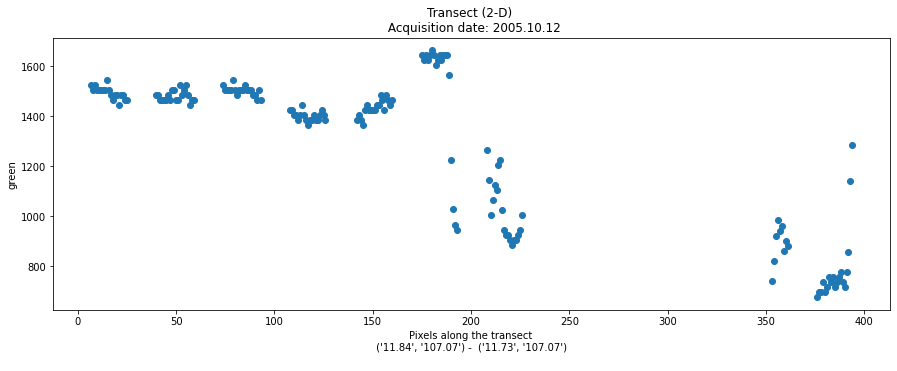

In [32]:
transect_plot(start, end, cloudless_dataset_for_acq_no[band])

### Create a 2D Transect plot of NDVI for one date

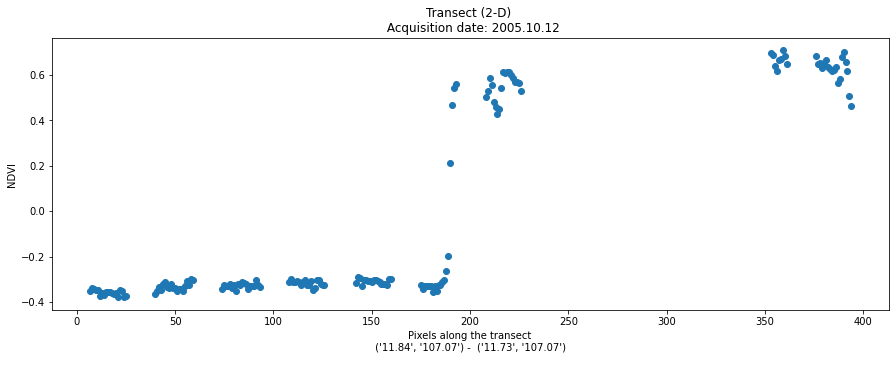

In [33]:
transect_plot(start, end, NDVI(cloudless_dataset_for_acq_no))

### Create a 3D Hovmoller plot of NDVI for the entire time series

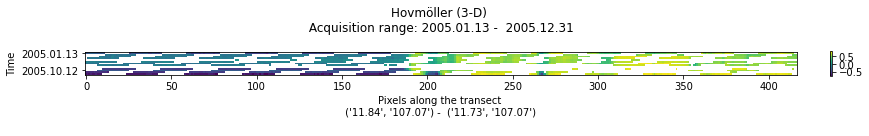

In [34]:
transect_plot(start, end, NDVI(cloudless_dataset))

### Create a 2D Transect plot of water existence for one date

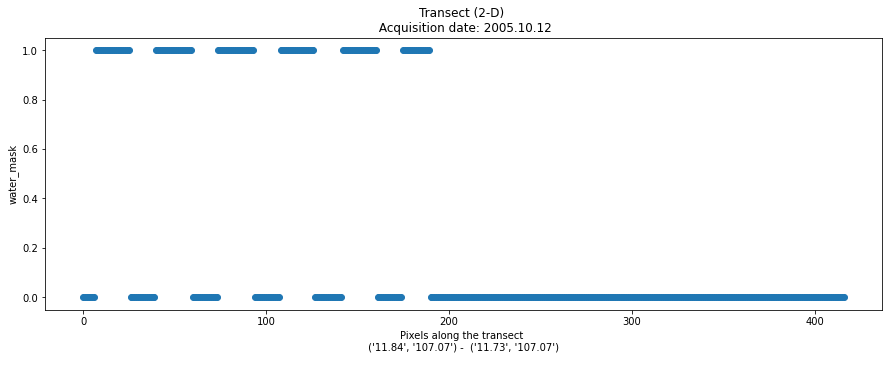

In [35]:
transect_plot(start, end, water_xarray.isel(time = acquisition_number))

### Create a 3D Hovmoller plot of water extent for the entire time series

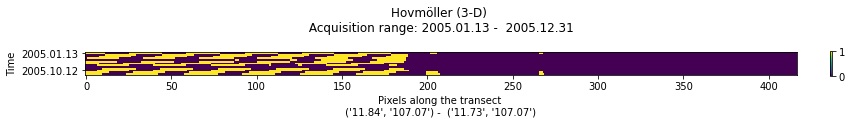

In [36]:
transect_plot(start, end, water_xarray)

### Create a 2D Transect plot of water quality (TSM) for one date

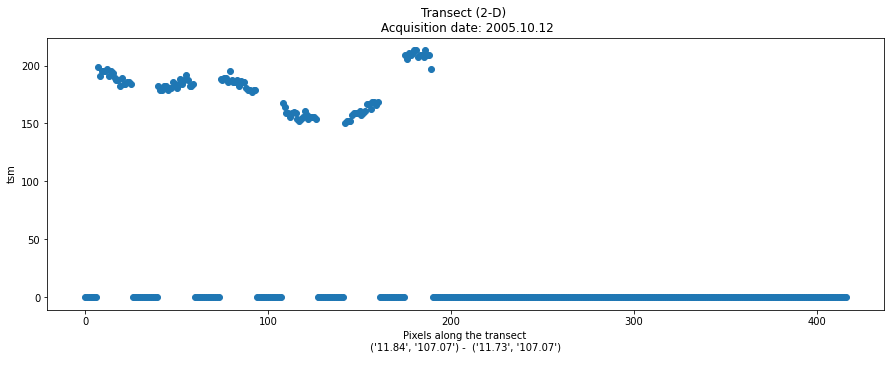

In [37]:
transect_plot(start, end, tsm_xarray.isel(time = acquisition_number))

### Create a 3D Hovmoller plot of water quality (TSM) for one date

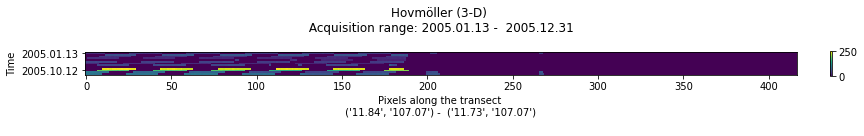

In [38]:
transect_plot(start, end, tsm_xarray)